# Karger's Algorithm

The goal of the algorithm is to find a global min-cut.
The graph is undirected and allows parallel edges.
The algorithm chooses an edge randomly and contracts it. The procedure is performed recursively until two nodes remain.

## Global mincut
### What is global min-cut?
The global min-cut problem is the following: given in input an undirected graph G = (V, E), we want to find the subset A ⊆ V such that
A  $ \neq $ ∅, A $ \neq $ V , and the number of edges with one endpoint in A and one endpoint in
V − A is minimized

### The basic iteration of Karger’s algorithm is the following:

-  While there are more than 2 vertices in the graph, we pick a random edge and contract it to form a *supernode*.
-  Output the set A of vertices of the original graph that have been contracted to give the final graph



__*Karger’s algorithm is a Monte Carlo algorithm and cut produced by it may not be minimum.*__
In the randomized step, we randomly pick an edge among the edges in the multi-set edges of the curret multigraph.

In [22]:
import random 
random.seed = 420
import copy
from time import time,sleep
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np

In [3]:
def getRandomEdge(graph):
    v = random.choice(list(graph.keys()))
    while len(graph[v])==0:
        v = random.choice(list(graph.keys()))
    w = random.choice(graph[v])
    edges_to_remove.append((v,w))
    return (v,w)

In [4]:
def draw_graph_highlight(graph,v,w):
    G=nx.MultiDiGraph(graph)
    color=[]
    
    for x,y in G.edges():
        if x==v and y==w:
            color.append('r')
        elif x==w and y==v:
            color.append('r')
        else:
            color.append('g')
    nx.draw_circular(G,with_labels=True,edge_color=color,width=3, font_size=11)

In [5]:
def karger(graph):
    while len(graph) > 2:
        v, w = getRandomEdge(graph)
#         print("Merging " + str(w)+" with "+str(v))
#         draw_graph_highlight(graph,v,w)
#         print(v,w)
        contract(graph, v, w)
        plt.show()
    return len(graph[graph.keys()[0]])
 

In [6]:
def contract(graph, v, w):
    for node in graph[w]:
        if node != v:
            graph[v].append(node)
            graph[node].append(v)
        if w in graph[node]:
            graph[node].remove(w)
    graph.pop(w)

In [7]:
def readGraphFromFile(filename):
    graph = {}
    file = open(filename)
    for line in file:
        edges = []
        line = line.split()
        line = [int(x) for x in line]
        graph[int(line[0])] = line[1:]
    print(str(len(graph)) + " vertices in dictionary.")
    return graph


In [8]:
iterations = 10
graph = readGraphFromFile('fulkerson.txt')

11 vertices in dictionary.


In [9]:
cuts = []
edges_to_remove = []
edge_iteration = []

In [10]:
def find_min_cut(graph, iterations):

    times = []
    start = time()

    for i in range(iterations):
        copiedGraph = copy.deepcopy(graph)
        start = time()
        mincut = karger(copiedGraph)
        end = time()
        cuts.append(mincut)
        a = copy.deepcopy(edges_to_remove)
        edge_iteration.append(a) 
        del edges_to_remove[:] 
        times.append(end-start)
    print("MinCut is " + str(min(cuts)))
    print("Total time taken: {}s, avg time: {}s ".format(sum(times),sum(times)/len(times)))
    return cuts, times

In [11]:
cuts, times = find_min_cut(graph,iterations)

MinCut is 3
Total time taken: 0.000952005386353s, avg time: 9.52005386353e-05s 


In [39]:
def get_random_graph(V,E):
    vertices  = [i for i in range(V)]
    graph = {i:[] for i in vertices}
    count = 0
    while count < E:
        u = random.choice(vertices)
        v = random.choice(vertices)
        if u == v:
            pass
        else:
            if v in graph[u]:
                pass
            else:
                graph[u].append(v)
                graph[v].append(u)
                count +=1
    return graph

In [ ]:
graph= get_random_graph(4,4)

In [12]:
find_min_cut(graph,10)

MinCut is 3
Total time taken: 0.00135517120361s, avg time: 0.000135517120361s 


([3, 4, 4, 3, 6, 4, 4, 4, 3, 4, 3, 4, 3, 3, 3, 5, 3, 3, 4, 5],
 [0.00020194053649902344,
  0.00015497207641601562,
  0.00013899803161621094,
  0.0001239776611328125,
  0.00012803077697753906,
  0.00012111663818359375,
  0.00011706352233886719,
  0.00012612342834472656,
  0.00011992454528808594,
  0.00012302398681640625])

In [13]:
cuts

[3, 4, 4, 3, 6, 4, 4, 4, 3, 4, 3, 4, 3, 3, 3, 5, 3, 3, 4, 5]

In [14]:
cuts.index(min(cuts))

0

In [15]:
edge_iteration

[[(5, 8), (7, 10), (11, 5), (1, 3), (9, 11), (6, 1), (2, 6), (9, 2), (9, 7)],
 [(11, 10), (8, 9), (8, 11), (4, 1), (5, 6), (3, 5), (4, 3), (7, 8), (4, 2)],
 [(9, 10), (1, 4), (1, 3), (1, 7), (8, 5), (1, 6), (1, 2), (11, 9), (1, 8)],
 [(1, 2), (7, 4), (5, 6), (8, 5), (11, 8), (1, 3), (7, 1), (7, 11), (9, 7)],
 [(6, 5), (9, 11), (9, 10), (2, 1), (8, 9), (7, 4), (8, 6), (2, 7), (3, 8)],
 [(5, 8), (6, 3), (6, 4), (10, 11), (9, 10), (1, 2), (1, 6), (7, 1), (5, 9)],
 [(5, 2), (7, 6), (7, 5), (7, 10), (9, 7), (3, 9), (1, 3), (8, 11), (4, 1)],
 [(11, 10), (11, 9), (2, 5), (2, 3), (11, 8), (7, 11), (6, 2), (1, 6), (4, 1)],
 [(7, 10), (6, 9), (8, 6), (1, 4), (5, 8), (11, 5), (2, 1), (2, 3), (7, 11)],
 [(6, 5), (1, 3), (9, 6), (2, 1), (11, 9), (2, 4), (8, 11), (10, 7), (2, 8)],
 [(11, 8), (2, 5), (9, 10), (11, 9), (3, 2), (4, 3), (4, 1), (11, 6), (11, 4)],
 [(8, 5), (2, 8), (6, 7), (6, 10), (3, 2), (6, 3), (1, 4), (11, 6), (11, 9)],
 [(2, 5), (3, 1), (4, 7), (10, 11), (9, 10), (2, 3), (6, 4), (6,

In [19]:
required_edges = edge_iteration[cuts.index(min(cuts))]
print(required_edges)

[(5, 8), (7, 10), (11, 5), (1, 3), (9, 11), (6, 1), (2, 6), (9, 2), (9, 7)]


11 vertices in dictionary.
(5, 8)


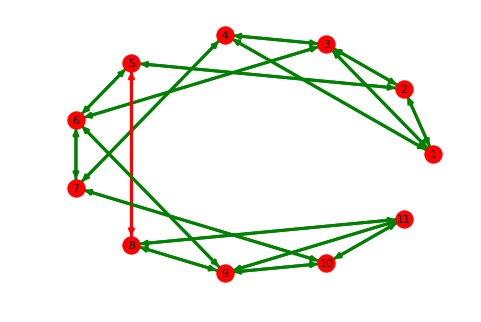

(7, 10)


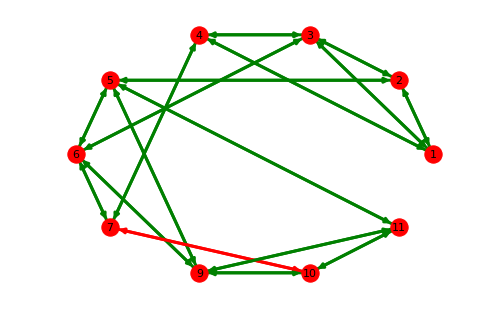

(11, 5)


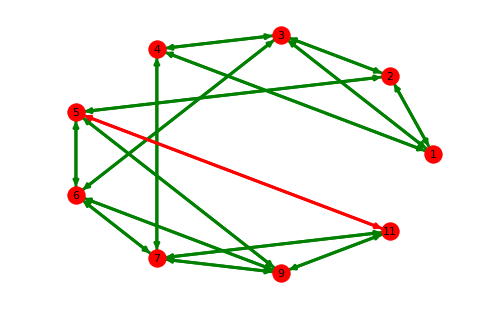

(1, 3)


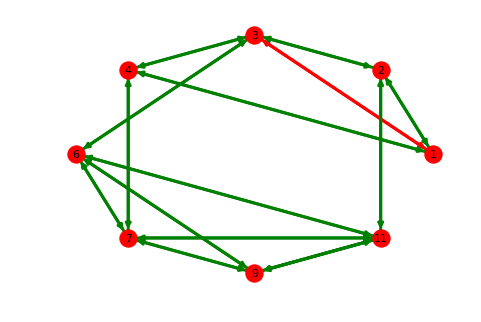

(9, 11)


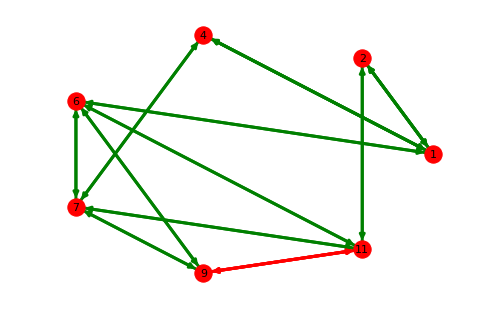

(6, 1)


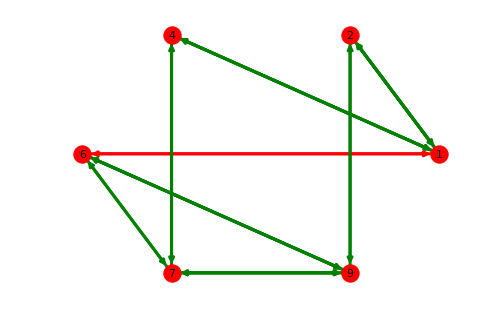

(2, 6)


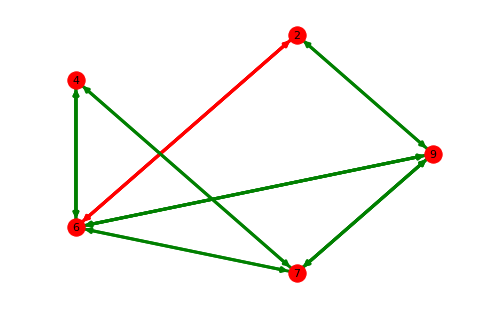

(9, 2)


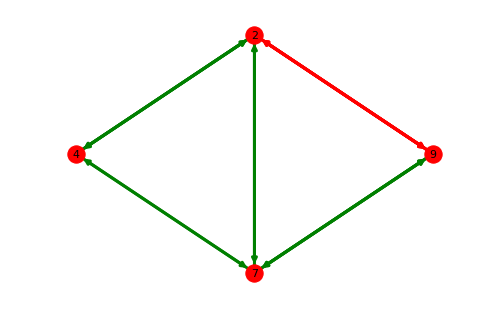

(9, 7)


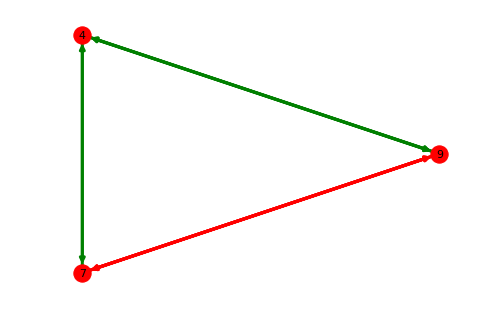

(9, 7)


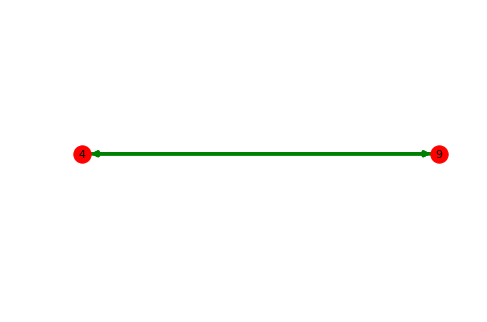

In [20]:
graph_ = readGraphFromFile('fulkerson.txt')
G=nx.MultiDiGraph(graph_)
G.edges()

for v,w in required_edges:
    print(v,w)
    G=nx.MultiDiGraph(graph_)
    draw_graph_highlight(graph_,v,w)
        
    contract(graph_, v, w)
    plt.show()
print(v,w)   
draw_graph_highlight(graph_,v,w)

11 vertices in dictionary.
(5, 8)


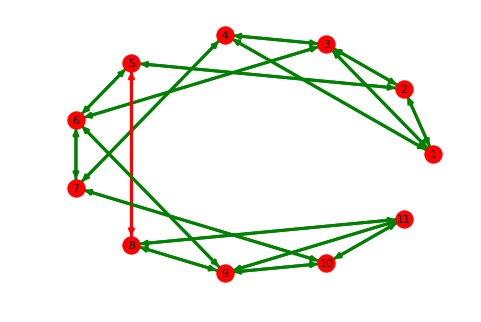

(7, 10)


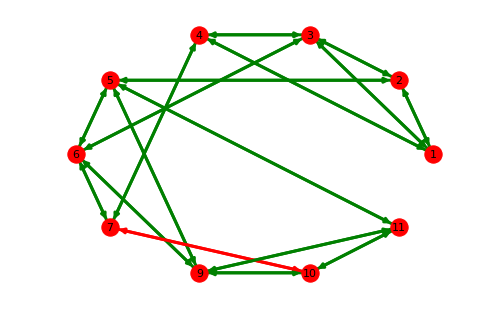

(11, 5)


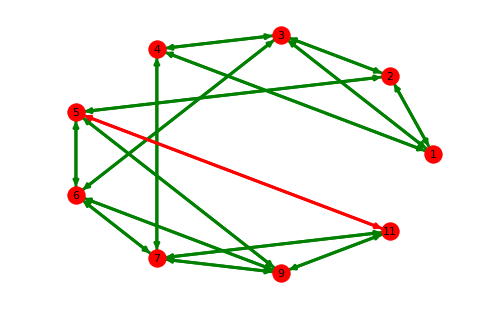

(1, 3)


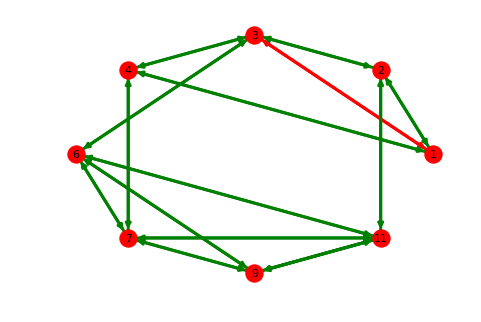

(9, 11)


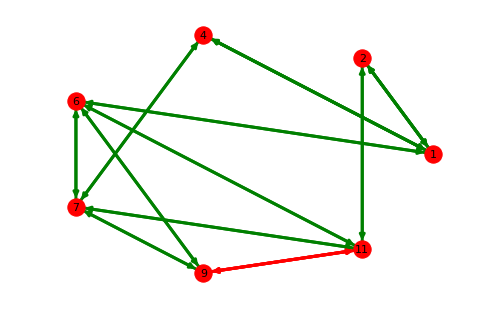

(6, 1)


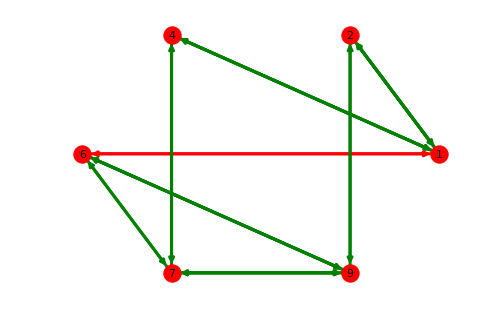

(2, 6)


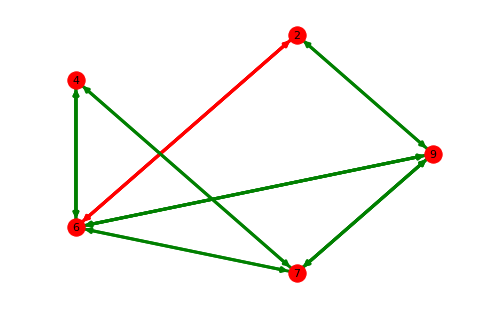

(9, 2)


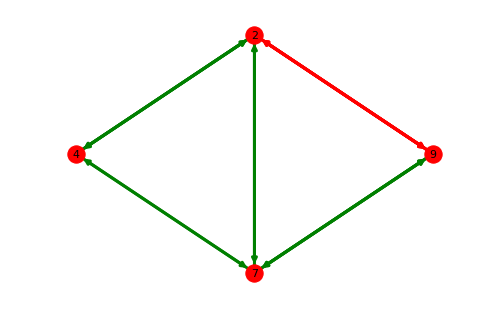

(9, 7)


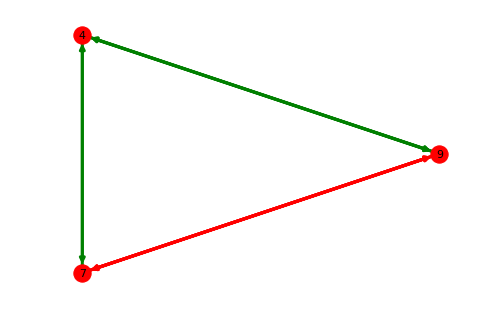

(9, 7)


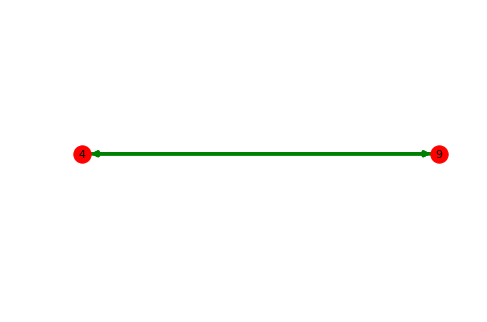

In [20]:
graph_ = readGraphFromFile('fulkerson.txt')
G=nx.MultiDiGraph(graph_)
G.edges()

for v,w in required_edges:
    print(v,w)
    G=nx.MultiDiGraph(graph_)
    draw_graph_highlight(graph_,v,w)
        
    contract(graph_, v, w)
    plt.show()
print(v,w)   
draw_graph_highlight(graph_,v,w)

In [17]:

G=nx.MultiDiGraph(graph_)
print(G.number_of_edges(1,11))
print(graph_)
draw_graph_highlight(graph_,v,w)

NameError: name 'graph_' is not defined

# Analysis

## Convergence complexity

__*Karger’s algorithm is a Monte Carlo algorithm and cut produced by it may not be minimum.*__
In the randomized step, we randomly pick an edge among the edges in the multi-set edges of the curret multigraph.
<br/>

**Fact 1.** If degree(u) denotes the number of edges connecting to the node u,then

$$\sum_{u \epsilon V } degree(u) = 2 |E| $$

**Fact 2.** If there are n nodes, then the average degree of a node is 2|E|/n.
When you pick a node X at random,
$$ E[degree(X)] = \sum_{u \epsilon V}  Pr(X = u)degree(u) =  \frac{1}{n } \sum_{u \epsilon V }  degree(u) $$ 
<br/>
Using the first fact,we get

$$\frac{1}{n } \sum_{u \epsilon V } =  \frac{2|E|}{n }$$


**Fact3.** The size of minimum cut is at most 2|E|/n.
The size of th minimum cut must be less than or equal than to the degree(u), where u $ \epsilon $ V. This is because for any node in the set, we can always remove all the edges conected to it to form a cut. The size of minimum cut must be less than or equal to this value. 
Combining this with the previous facts gives us this fact

**Fact4**. The probability that a random edge lies across the minimum cut is 2|E|/n.
This is because the maximum no. of edges in the minimumcut can be 2/n and there are |E| edges to choose from.

The Karger's Algorithm returns the right answer as long as it doesnt pick any edge across the minimum cut. For every node that we contract, we lose an edge in our contracted graph.

**Pr(final cut is min cut)** = $Pr($first selected edge is not in mincut$)$ 
x $Pr($second selected edge is not in mincut$)$ x $...$ 

$$\geqq (1 -\frac{2}{n})(1 -\frac{2}{n})(1 -\frac{2}{n-2})...(1 -\frac{2}{4})(1 -\frac{2}{3})$$

$$= (\frac{n-2}{n})(\frac{n-3}{n-1})(\frac{n-4}{n-2})...(\frac{2}{4})(\frac{1}{3})$$

**$$= (\frac{2}{n(n-1)})$$**

The Karger's algorithm runs successfully with a probability p $ \geqq $ 2/$n^2$
Therefore, it should be run $\Omega(n^2 logn)$ times, and the minimum value obtained from all he iterations shold be chosen.This is because:

For any $x \geqq 1$,we have
$$\frac{1}{4} \leqq (1 - \frac{1}{x})^x \leqq \frac{1}{e}$$

If the Krager's Algorithm is run $(n(n-1)/2)ln (n)$ times, the probability that we dont get a minimum cut is 

$(1 - \frac{2}{n(n-1)})^\frac{n(n-1)ln(n)}{2})  \leqq  (\frac{1}{e})^{ln(n)}  =  \frac{1}{n}$

## Time Complexity

Running the Krager's Algorithm $O(n^2logn)$times gives a minimum cut with a probability of $\frac{1}{n}$ and takes a time $$ T(n) = O(n^4logn)$$

In [ ]:
def get_probabilities(n, number_of_iterations):
    p = []
    for i in range(number_of_iterations):
        prob_right = 2.0/(n*(n-1))
        prob_wrong = 1 - prob_right
        prob_wrong_i_times = prob_wrong**i
        prob_right_atleast_once = 1 - prob_wrong_i_times
        p.append(prob_right_atleast_once)
    return p
probs = {}
plt.figure(figsize=(20,10))
for i in [10,50,100,150,300]:
    plt.xlabel("number of iterations")
    plt.ylabel("probaility of being right")
    probs[i]= get_probabilities(i, 6000)
    plt.plot(probs[i], label=i)
    plt.legend()

In [ ]:
probs = {}
multiple = 400
plt.figure(figsize=(20,10))
for i in [10,50,100,150,300]:
    plt.xlabel("mulitples of n")
    plt.ylabel("probaility of being right")
    probs[i]= []
    for j in range(0,multiple):
        probs[i].append(1-(1-(2.0/(i*(i-1))))**(i*j))
    plt.plot(probs[i],label = i)
    plt.legend()

In [ ]:
def number_of_iterations_needed(prob, num_nodes):
    return math.log1p(-prob)/math.log1p(-2.0/(n*(n-1)))

iterations = {}
plt.figure(figsize=(20,10))
for n in [10,20,50,100,150]:
    plt.xlabel("probability of being right")
    plt.ylabel("number of iterations needed")
    iterations[n] = []
    probs = list(np.linspace(0,0.9,100))
    for p in probs:
        iterations[n].append(number_of_iterations_needed(p,n))
    plt.plot(probs, iterations[n],label=n)
    plt.legend()

In [ ]:
def number_of_operations_needed(prob, num_nodes):
    return number_of_iterations_needed(prob, num_nodes)* complexity(num_nodes)

In [ ]:
def complexity(num_nodes):
    return num_nodes**3

In [ ]:
iterations = {}
plt.figure(figsize=(20,10))
for n in [10,20,50,100,150]:
    plt.xlabel("probability of being right")
    plt.ylabel("number of operations needed")
    iterations[n] = []
    probs = list(np.linspace(0,0.9,100))
    for p in probs:
        iterations[n].append(number_of_operations_needed(p,n))
    plt.plot(probs, iterations[n],label=n)
    plt.legend()

## Strager - Stein Algorithm

### The basic iteration of Karger-Stein’s algorithm is the following:

-  While there are more than 6 vertices in the graph, we call the Krager's algorithmic function to calculate the minimum cut.
-  Run the original algorithm down to n / $\sqrt{2}$ + 1 verices.
-  Recurse on the resulting graph


### Time complexity Analysis


$$T(n) = 2(n^2 + T(n / \sqrt{2}))$$

We use Master theorem to solve the above recurrence, which gives us 

$T(n) = O(n^2 logn)$

In [ ]:
import random 
random.seed = 420
import copy
from time import time,sleep
import math

In [ ]:
def mincut_accurate(graph):
    if len(graph)<=6:
        return find_min_cut2(graph,4)
    a=copy.deepcopy(graph)
    b=copy.deepcopy(graph)
    lim = int(len(graph)//1.414 + 1)
    while len(a) > lim:
        v, w = getRandomEdge2(a)
        contract(a, v, w)    
    while len(b) > lim:
        v, w = getRandomEdge2(b)
        contract(b, v, w)
    return min(fast_mincut(a),fast_mincut(b))

graph= readGraphFromFile('kargerMinCut.txt')
# print(graph)
print("hi")
mc=mincut_accurate(graph)
# print("hi")
print(mc)

In [ ]:
def getRandomEdge2(graph):
    v = random.choice(list(graph.keys()))
    while len(graph[v])==0:
        v = random.choice(list(graph.keys()))
    w = random.choice(graph[v])
    return (v,w)

In [ ]:
def Krager(graph):
    while len(graph) > 2:
        v, w = getRandomEdge2(graph)
#         print("Merging " + str(w)+" with "+str(v))
#         draw_graph_highlight(graph,v,w)
#         print(v,w)
        contract(graph, v, w)
        plt.show()
    return len(graph[list(graph.keys())[0]])
 

In [ ]:
def contract(graph, v, w):
    for node in graph[w]:
        if node != v:
            graph[v].append(node)
            graph[node].append(v)
        if w in graph[node]:
            graph[node].remove(w)
    graph.pop(w)

In [ ]:
def readGraphFromFile(filename):
    graph = {}
    file = open(filename)
    for line in file:
        edges = []
        line = line.split()
        line = [int(x) for x in line]
        graph[int(line[0])] = line[1:]
    print(str(len(graph)) + " vertices in dictionary.")
    return graph

In [ ]:
def find_min_cut(graph, iterations):
    cuts = []
    edges_to_remove = []
    edge_iteration = []
    times = []
    start = time()

    for i in range(iterations):
        copiedGraph = copy.deepcopy(graph)
        start = time()
        mincut = karger(copiedGraph)
        end = time()
        cuts.append(mincut)
        a = copy.deepcopy(edges_to_remove)
        edge_iteration.append(a) 
        del edges_to_remove[:] 
        times.append(end-start)
    print("MinCut is " + str(min(cuts)))
    print("Total time taken: {}s, avg time: {}s ".format(sum(times),sum(times)/len(times)))
    return cuts, times

In [ ]:
def find_min_cut2(graph, iterations):
    cuts = []

    for i in range(iterations):
        copiedGraph = copy.deepcopy(graph)
        mincut = Krager(copiedGraph)
        cuts.append(mincut)
    return min(cuts)

In [ ]:
def fast_mincut(graph):
    if len(graph)<=6:
        return find_min_cut2(graph,4)
    a=copy.deepcopy(graph)
    b=copy.deepcopy(graph)
    lim = int(len(graph)//1.414 + 1)
    while len(a) > lim:
        v, w = getRandomEdge2(a)
        contract(a, v, w)    
    while len(b) > lim:
        v, w = getRandomEdge2(b)
        contract(b, v, w)
    return min(fast_mincut(a),fast_mincut(b))

graph= readGraphFromFile('kargerMinCut.txt')
print("hi")
mc=mincut_accurate(graph)
print('The mincut calcualed is' +str(mc))